In [1]:
import sys
!{sys.executable} -m pip install pandas plotly matplotlib seaborn scikit-learn numpy --upgrade --quiet

#IMPORTS
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# ***Data Collection***

In [2]:
data=pd.read_csv('Medical_Cost.csv')
data=pd.DataFrame(data)
data.describe(include='all')
d=data.select_dtypes(exclude='object')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# ***EDA***

In [3]:
px.histogram(data,x='age',marginal='rug',nbins=47)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'age=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 47,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('ExIcISAfLiUlPBk+FzgbEzQXOB48Hh' ... 'ITEiMnHz4+Kh89KjMXNDkXNDISEhU9'),
                    'dtype': 'i1'},
              'xaxis': 'x',
              'yaxis': 'y'},
             {'boxpoints': 'all',
              'fillcolor': 'rgba(255,255,255,0)',
              'hoveron': 'points',
              'hovertemplate': 'age=%{x}<extra></extra>',
              'jitter': 0,
              'legendgroup': '',
              'line': {'color': 'rgba(255,255,255,0)'},
              'marker': {'color': '#636efa', 'symbol': 'line-ns-open'},
              'name': '',
              'showlegend': False,
              'type': 'box',
              'x': {'bdata': ('ExIcISAfLiUlPBk+FzgbEzQXOB48Hh' ... 'ITEiMnHz4+Kh89KjMXNDkXNDISEhU9'),
                    'dtype': 'i1'},
              'xaxis': 'x2',
              'yaxis': 'y2'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'age'}},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0], 'matches': 'x', 'showgrid': True, 'showticklabels': False},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 0.8316], 'title': {'text': 'count'}},
               'yaxis2': {'anchor': 'x2',
                          'domain': [0.8416, 1.0],
                          'matches': 'y2',
                          'showgrid': False,
                          'showline': False,
                          'showticklabels': False,
                          'ticks': ''}}
})

In [4]:
px.histogram(data,x='charges')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'charges=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('YOXQIjt90EBTliGONfaaQMHKoUV2Yb' ... 'QGgVV3mUDhehSux1+fQDC7Jw9XddxA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'charges'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [5]:
px.violin(x=data['sex'],y=data['charges'],color=data['smoker'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': False},
              'hovertemplate': 'color=yes<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'yes',
              'marker': {'color': '#636efa'},
              'name': 'yes',
              'offsetgroup': 'yes',
              'orientation': 'v',
              'scalegroup': 'True',
              'showlegend': True,
              'type': 'violin',
              'x': array(['female', 'female', 'male', ..., 'male', 'female', 'female'],
                         shape=(274,), dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('YOXQIjt90ECV1AloLijbQAYSFD94V+' ... 'BQVXHbQDBMpgoMb+VAMLsnD1d13EA='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'box': {'visible': False},
              'hovertemplate': 'color=no<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'no',
              'marker': {'color': '#EF553B'},
              'name': 'no',
              'offsetgroup': 'no',
              'orientation': 'v',
              'scalegroup': 'True',
              'showlegend': True,
              'type': 'violin',
              'x': array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
                         shape=(1064,), dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('U5YhjjX2mkDByqFFdmGxQMtneR4eeN' ... 'v2O6FA3SQGgVV3mUDhehSux1+fQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'violinmode': 'group',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [6]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['sex']=data['sex'].map({'male':1,'female':0})
enc=OrdinalEncoder()
data['region']=enc.fit_transform(data[['region']])
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3.0,16884.92400
1,18,1,33.770,1,0,2.0,1725.55230
2,28,1,33.000,3,0,2.0,4449.46200
3,33,1,22.705,0,0,1.0,21984.47061
4,32,1,28.880,0,0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1.0,10600.54830
1334,18,0,31.920,0,0,0.0,2205.98080
1335,18,0,36.850,0,0,2.0,1629.83350
1336,21,0,25.800,0,0,3.0,2007.94500


<Axes: >

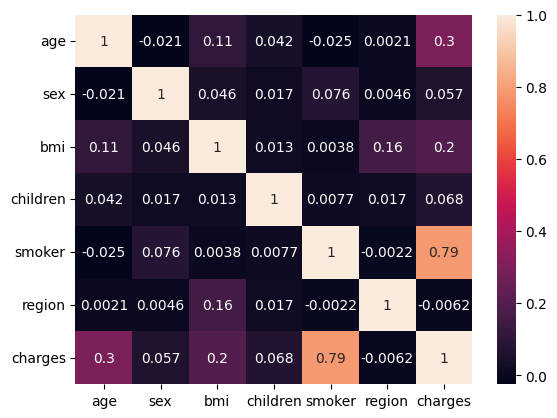

In [7]:
sns.heatmap(data.corr(),annot=True)

# ***Linear Regression With Single Feature***

In [8]:
px.scatter(x=data['age'],y=data['charges'],color=data['smoker'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AQAAAAAAAAAAAAABAAABAAAAAAEAAA' ... 'AAAAAAAAEAAQAAAAAAAAAAAAAAAAAB'),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('ExIcISAfLiUlPBk+FzgbEzQXOB48Hh' ... 'ITEiMnHz4+Kh89KjMXNDkXNDISEhU9'),
                    'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('YOXQIjt90EBTliGONfaaQMHKoUV2Yb' ... 'QGgVV3mUDhehSux1+fQDC7Jw9XddxA'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [9]:
data=data[data.smoker==0]
data.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

4784.595754855184


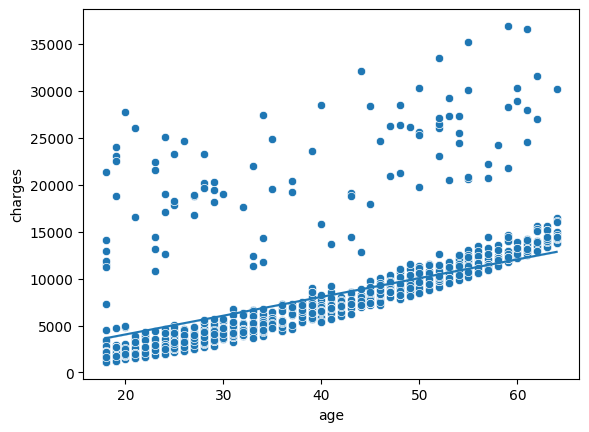

In [10]:
def pred(w,b):
  prediction= w * data.age + b
  return prediction
  # rmse=m.sqrt(sum(data.charges-prediction)/len(data.charges))
  # print(rmse)
sns.scatterplot(x=data.age,y=data.charges)
sns.lineplot(x=data.age,y=pred(200,50))
def rmse(x,y):
  print((sum((x-y)**2)/len(x))**0.5)
a=pred(200,50)
rmse(data.charges,a)

In [11]:
trainx,testx,trainy,testy=train_test_split(data.bmi,data.charges,random_state=0)
trainx = trainx.values.reshape(-1, 1)
testx = testx.values.reshape(-1, 1)
model=LinearRegression()
model.fit(trainx,trainy)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
rmse(testy,model.predict(testx))

6488.76906931403


In [13]:
model.predict(np.array([[28],[30],[35],[39],[51]]))

array([7952.0661373 , 8119.36916195, 8537.62672357, 8872.23277287,
       9876.05092077])

In [14]:
w=float(model.coef_)

C:\Users\Tabah\AppData\Local\Temp\ipykernel_12824\3304971521.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [15]:
b=float(model.intercept_)

<Axes: xlabel='age', ylabel='charges'>

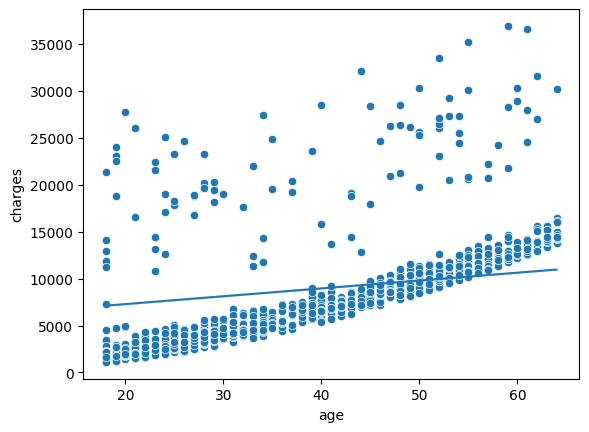

In [16]:
sns.scatterplot(x=data.age,y=data.charges)
sns.lineplot(x=data.age,y=pred(w,b))

In [17]:
from sklearn.linear_model import SGDRegressor
model2=SGDRegressor()
model2.fit(trainx,trainy)
rmse(testy,model2.predict(testx))
# w=float(model2.coef_)
# b=float(model2.intercept_)

7448.758347268715


<Axes: xlabel='age', ylabel='charges'>

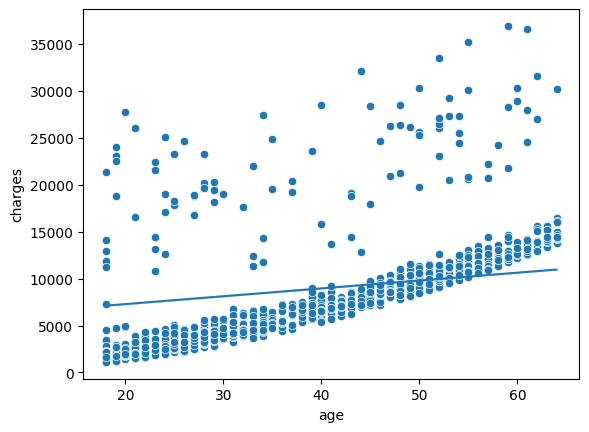

In [18]:
sns.scatterplot(x=data.age,y=data.charges)
sns.lineplot(x=data.age,y=pred(w,b))

In [19]:
model2.predict(np.array([[28],[30],[35],[39],[51]]))

array([ 8234.46077765,  9608.75481291, 13044.48990107, 15793.0779716 ,
       24038.84218319])

# ***Linear Regression with Multiple Features***

In [20]:
from sklearn.metrics import mean_absolute_error
x=data[['age','bmi','smoker']]
y=data['charges']
tx,Tx,ty,Ty=train_test_split(x,y,random_state=0)
model=LinearRegression()
model.fit(tx,ty)
mae=mean_absolute_error(Ty,model.predict(Tx))
mae

2715.127898020943

In [21]:
mae/np.median(Ty)

np.float64(0.318498762344069)

In [22]:
rmse(Ty,model.predict(Tx))
mae

5243.160347432613


2715.127898020943

In [23]:
def lineeq(a,b):
  return (float(a[0])*data.age)+(float(a[1])*data.bmi)+(float(a[2])*data.smoker)+b

In [24]:
a=model.coef_
b=model.intercept_
a,b

(array([266.80193804,  15.01625607,   0.        ]),
 np.float64(-2665.9867203133854))